In [55]:
import pandas as pd
import nltk.data
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [3]:
# load in each candidate data
bernie = pd.read_csv("./Data/All_Candidates/Bernie_Sanders.csv")
biden = pd.read_csv("./Data/All_Candidates/Joe_Biden.csv")
trump = pd.read_csv("./Data/All_Candidates/Donald_Trump.csv")

In [4]:
bernie.head()

,title,text,media,word_count,candidate_name
0,A Sign of the Times? The Democratic Primary Ha...,Hide highlightingFull TextTranslateUndo Transl...,New York Times,1122.0,Bernie Sanders
1,"Tops in Iowa, Under Attack At Every Turn: [Nat...",Hide highlightingFull TextTranslateUndo Transl...,New York Times,1995.0,Bernie Sanders
2,Gender and War Dominate Debate by 6 Democrats:...,Hide highlightingFull TextTranslateUndo Transl...,New York Times,2154.0,Bernie Sanders
3,"Once Hawking Big-Ticket Ideas, Democrats Refoc...",Hide highlightingFull TextTranslateUndo Transl...,New York Times,1892.0,Bernie Sanders
4,Sanders Gets Endorsement Of Young Climate Grou...,Hide highlightingFull TextTranslateUndo Transl...,New York Times,1005.0,Bernie Sanders


In [5]:
# extract text
bernie_text = bernie.iloc[:,1]

biden_text = biden.iloc[:,1]

trump_text = trump.iloc[:,1]

In [6]:
# Doing Sentiment Analysis for each candidates
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [7]:
# Test each token as positive, negative or neutral, and generate a score
# Bernie first
bernie_table = []
for i in bernie['text']:
    bernie_scores = {}
    bernie_scores['sia_positive'] = sia.polarity_scores(i)['pos']*100
    bernie_scores['sia_negative'] = sia.polarity_scores(i)['neg']*100
    bernie_scores['sia_neutral'] = sia.polarity_scores(i)['neu']*100
    bernie_scores['sia_compound'] = sia.polarity_scores(i)['compound']
    
    bernie_table.append(bernie_scores)
    
#print(sia_table)

In [8]:
# See the results
bernie_table = pd.DataFrame(bernie_table)
bernie_table=bernie_table.sort_values(by='sia_compound' , ascending=False).reset_index(drop=True)

print(bernie_table)
bernie_table.tail(50)

     sia_positive  sia_negative  sia_neutral  sia_compound
0            16.7           2.9         80.4        0.9999
1            15.3           3.8         80.9        0.9998
2            12.3           2.7         84.9        0.9998
3            13.9           3.7         82.3        0.9998
4            14.1           4.6         81.3        0.9998
..            ...           ...          ...           ...
445           7.9          11.0         81.1       -0.9956
446           6.2           9.9         83.9       -0.9959
447           7.3          10.3         82.4       -0.9976
448           6.3          13.2         80.5       -0.9983
449           7.0          12.5         80.5       -0.9992

[450 rows x 4 columns]


,sia_positive,sia_negative,sia_neutral,sia_compound
400,9.6,8.5,81.9,0.9505
401,6.4,6.0,87.6,0.9429
402,8.3,7.7,84.0,0.9374
403,9.2,8.1,82.7,0.9372
404,9.2,8.1,82.7,0.9372
405,4.6,3.9,91.5,0.8877
406,4.6,3.9,91.5,0.8877
407,9.4,8.5,82.1,0.8846
408,8.4,7.5,84.1,0.8799
409,7.7,7.1,85.2,0.8727


In [9]:
# See what kinds of sentiment appear more
bernie_mean = bernie_table.mean()
bernie_mean = bernie_mean.to_frame().transpose()
bernie_mean = bernie_mean.rename(index={0:'Bernie'})
bernie_mean

,sia_positive,sia_negative,sia_neutral,sia_compound
Bernie,9.904222,5.417778,84.674,0.862205


In [10]:
# Biden
biden_table = []
for i in biden['text']:
    biden_scores = {}
    biden_scores['sia_positive'] = sia.polarity_scores(i)['pos']*100
    biden_scores['sia_negative'] = sia.polarity_scores(i)['neg']*100
    biden_scores['sia_neutral'] = sia.polarity_scores(i)['neu']*100
    biden_scores['sia_compound'] = sia.polarity_scores(i)['compound']
    
    biden_table.append(biden_scores)
    
biden_table = pd.DataFrame(biden_table)
biden_table=biden_table.sort_values(by='sia_compound' , ascending=False).reset_index(drop=True)
print(biden_table)

     sia_positive  sia_negative  sia_neutral  sia_compound
0            15.4           2.7         81.9        1.0000
1            16.7           3.0         80.4        0.9999
2            14.3           6.2         79.5        0.9999
3            15.3           3.8         80.9        0.9998
4            15.9           4.4         79.7        0.9997
..            ...           ...          ...           ...
445           8.3          11.2         80.5       -0.9969
446           7.3          10.4         82.4       -0.9976
447           9.2          14.2         76.6       -0.9989
448           7.0          12.5         80.5       -0.9992
449           9.7          11.3         79.1       -0.9992

[450 rows x 4 columns]


In [11]:
biden_mean = biden_table.mean()
biden_mean = biden_mean.to_frame().transpose()
biden_mean = biden_mean.rename(index={0:'Biden'})
biden_mean

,sia_positive,sia_negative,sia_neutral,sia_compound
Biden,9.393333,5.545556,85.062222,0.754183


In [12]:
# Trump
trump_table = []
for i in trump['text']:
    trump_scores = {}
    trump_scores['sia_positive'] = sia.polarity_scores(i)['pos']*100
    trump_scores['sia_negative'] = sia.polarity_scores(i)['neg']*100
    trump_scores['sia_neutral'] = sia.polarity_scores(i)['neu']*100
    trump_scores['sia_compound'] = sia.polarity_scores(i)['compound']
    
    trump_table.append(trump_scores)
    
trump_table = pd.DataFrame(trump_table)
trump_table=trump_table.sort_values(by='sia_compound' , ascending=False).reset_index(drop=True)
print(trump_table)

     sia_positive  sia_negative  sia_neutral  sia_compound
0            15.4           2.7         81.9        1.0000
1            10.7           5.4         83.9        0.9999
2            16.7           3.0         80.4        0.9999
3            17.0           6.0         77.0        0.9998
4            13.1           7.7         79.2        0.9998
..            ...           ...          ...           ...
445           5.9          11.1         83.0       -0.9992
446           7.0          12.5         80.5       -0.9992
447           9.7          11.3         79.0       -0.9992
448           9.2          12.3         78.6       -0.9993
449           7.9          14.4         77.7       -0.9996

[450 rows x 4 columns]


In [13]:
trump_mean = trump_table.mean()
trump_mean = trump_mean.to_frame().transpose()
trump_mean = trump_mean.rename(index={0:'Trump'})
trump_mean

,sia_positive,sia_negative,sia_neutral,sia_compound
Trump,8.795111,6.300889,84.904889,0.517104


In [22]:
all_mean = pd.concat([bernie_mean, biden_mean, trump_mean])
all_mean

,sia_positive,sia_negative,sia_neutral,sia_compound
Bernie,9.904222,5.417778,84.674000,0.862205
Biden,9.393333,5.545556,85.062222,0.754183
Trump,8.795111,6.300889,84.904889,0.517104


In [66]:
df = pd.DataFrame({
    'sia_positve': [8.795111, 9.393333, 9.904222],
    'sia_negative': [6.300889, 5.545556, 5.417778],
    'sia_neutral': [84.904889, 85.062222, 84.674000]
}, index=['Trump', 'Biden', 'Bernie'])
df

,sia_positve,sia_negative,sia_neutral
Trump,8.795111,6.300889,84.904889
Biden,9.393333,5.545556,85.062222
Bernie,9.904222,5.417778,84.674000


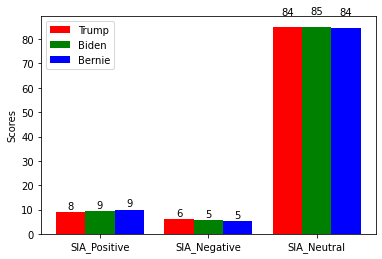

In [82]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [8.795111, 6.300889,84.904889]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [9.393333, 5.545556, 85.062222]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [9.904222, 5.417778, 84.674000]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')


ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('SIA_Positive', 'SIA_Negative', 'SIA_Neutral') )
ax.legend((rects1[0], rects2[0], rects3[0]), ('Trump', 'Biden', 'Bernie'), loc = 'best' )


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


In [22]:
The barchart shows the sia values for each candidate, we can see that most of the articles are considered as neutral, and each candidate 
has similar value for positive and negative. However, if we look at the three sia_compound values for the candidates, although all the 
values are higher than 0.5, which means the articles are considered as positive toward to the candidate, Trump has the lowest score
compare to the other two candidates, makes Trump the least favorable candidate for media am

AttributeError: 'Series' object has no attribute 'encode'

In [ ]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    print("Overall sentiment dictionary is: ", sentiment_dict)
    print("Sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    
    print("Sentence Overall Rated As", end = " ")
    
    if sentiment_dict['compound'] >= 0.05:
        print("Positive")
        
    elif sentiment_dict['compound'] <= 0.05:
        print("Negative")
    
    else:
        print("Neutral")